# Introduction #

In [1]:
import pandas as pd
import datetime
# to pull data from the internet
# may have to do conda install pandas-datareader
from pandas_datareader import data as web

In [2]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2016,11,30)

In [3]:
dataframe=web.DataReader("XOM","yahoo",start,end)

In [4]:
dataframe.head() 

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2010-01-04  68.720001  69.260002  68.190002  69.150002  27809100  56.700952
2010-01-05  69.190002  69.449997  68.800003  69.419998  30174700  56.922342
2010-01-06  69.449997  70.599998  69.339996  70.019997  35044700  57.414323
2010-01-07  69.900002  70.059998  69.419998  69.800003  27192100  57.233934
2010-01-08  69.690002  69.750000  69.220001  69.519997  24891800  57.004337

In [5]:
dataframe.tail()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2016-11-23  86.540001  87.080002  86.309998  86.919998   5996300  86.919998
2016-11-25  86.709999  87.139999  86.540001  87.120003   5042300  87.120003
2016-11-28  86.949997  87.129997  86.370003  86.470001   7208600  86.470001
2016-11-29  85.419998  86.080002  85.080002  85.900002   9150300  85.900002
2016-11-30  87.599998  88.190002  87.199997  87.300003  22371100  87.300003

In [6]:
%matplotlib inline
from matplotlib import pyplot, style
style.use('fivethirtyeight')


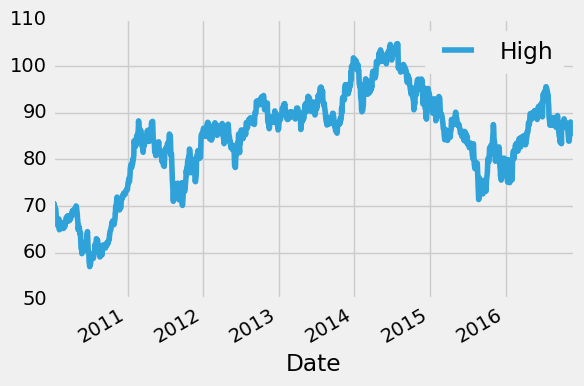

In [7]:
dataframe['High'].plot()
pyplot.legend()
pyplot.show()


# Pandas Basics #

In [8]:
# dictionary to dataframe
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

df_web_stats = pd.DataFrame(web_stats)

In [9]:
df_web_stats.head()

Bounce Rate  Day  Visitors
0           65    1        43
1           67    2        34
2           78    3        65
3           65    4        56
4           45    5        29

In [10]:
df_web_stats.set_index('Day',inplace=True)

In [11]:
df_web_stats.head()

Bounce Rate  Visitors
Day                       
1             65        43
2             67        34
3             78        65
4             65        56
5             45        29

In [12]:
df_web_stats[['Visitors','Bounce Rate']]

Visitors  Bounce Rate
Day                       
1          43           65
2          34           67
3          65           78
4          56           65
5          29           45
6          76           52

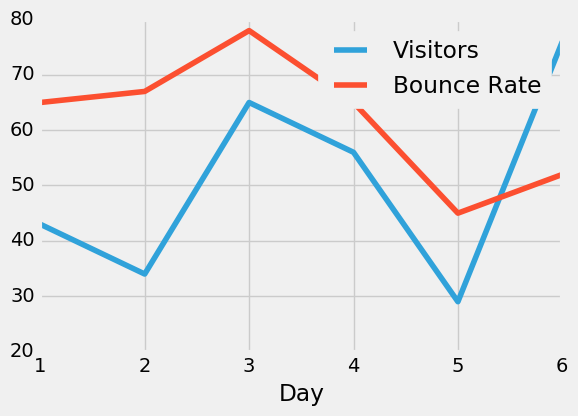

In [13]:
df_web_stats[['Visitors','Bounce Rate']].plot()
pyplot.legend()
pyplot.show()

# IO Basics #

In [14]:
# conda install quandl
import quandl

In [15]:
# on quandl website, search for [home value index 77006] (Austin, TX)
# use python api
df_3b=quandl.get("ZILL/Z77006_3B", authtoken="Ti87qx22utFydZWJHqyB")

In [16]:
df_3b.head()

Value
Date                
1996-04-30  178500.0
1996-05-31  178800.0
1996-06-30  178900.0
1996-07-31  179100.0
1996-08-31  178800.0

In [17]:
# while saving csv, if index_col is not specified, it will be lost
df_3b.to_csv('./data/df_3b.csv',index_col=0)

In [18]:
df_3b_csv=pd.read_csv('./data/df_3b.csv',index_col=0)

In [19]:
df_3b_csv.head()

Value
Date                
1996-04-30  178500.0
1996-05-31  178800.0
1996-06-30  178900.0
1996-07-31  179100.0
1996-08-31  178800.0

In [20]:
# change column names
df_3b_csv.columns=['Houser Prices']
df_3b_csv.head()

Houser Prices
Date                     
1996-04-30       178500.0
1996-05-31       178800.0
1996-06-30       178900.0
1996-07-31       179100.0
1996-08-31       178800.0

In [21]:
# save without headers
df_3b_csv.to_csv('./data/df_3b_cvs2.csv',header=False)

In [22]:
df_3b_csv2=pd.read_csv('./data/df_3b_cvs2.csv',names=['Date','House Prices'],index_col=0)
df_3b_csv2.head()

House Prices
Date                    
1996-04-30      178500.0
1996-05-31      178800.0
1996-06-30      178900.0
1996-07-31      179100.0
1996-08-31      178800.0

In [23]:
# save as html
df_3b_csv2.to_html('./data/df_3b.html')
# open the file in browser to check the house prices

In [24]:
# rename columns
df_3b_csv2.rename(columns={'House Prices':'Prices'},inplace=True)

In [25]:
df_3b_csv2.head()

Prices
Date                
1996-04-30  178500.0
1996-05-31  178800.0
1996-06-30  178900.0
1996-07-31  179100.0
1996-08-31  178800.0

# Building Dataset #

In [26]:
# housing price index for TX
df_hpi_tx=quandl.get("FMAC/HPI_TX",authtoken="Ti87qx22utFydZWJHqyB")

In [27]:
df_hpi_tx.head()

Value
Date                 
1975-01-31  32.659989
1975-02-28  32.970745
1975-03-31  33.542148
1975-04-30  34.383316
1975-05-31  34.652016

In [28]:
# will have to do: conda install html5lib
import html5lib
us_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
us_states[0]

0               1               2                  3
0   Abbreviation      State Name         Capital     Became a State
1             AL         Alabama      Montgomery  December 14, 1819
2             AK          Alaska          Juneau    January 3, 1959
3             AZ         Arizona         Phoenix  February 14, 1912
4             AR        Arkansas     Little Rock      June 15, 1836
5             CA      California      Sacramento  September 9, 1850
6             CO        Colorado          Denver     August 1, 1876
7             CT     Connecticut        Hartford    January 9, 1788
8             DE        Delaware           Dover   December 7, 1787
9             FL         Florida     Tallahassee      March 3, 1845
10            GA         Georgia         Atlanta    January 2, 1788
11            HI          Hawaii        Honolulu    August 21, 1959
12            ID           Idaho           Boise       July 3, 1890
13            IL        Illinois     Springfield   December 3, 1818
14            IN         Indiana    Indianapolis  December 11, 1816
15            IA            Iowa      Des Moines  December 28, 1846
16            KS          Kansas          Topeka   January 29, 1861
17            KY        Kentucky       Frankfort       June 1, 1792
18            LA       Louisiana     Baton Rouge     April 30, 1812
19            ME           Maine         Augusta     March 15, 1820
20            MD        Maryland       Annapolis     April 28, 1788
21            MA   Massachusetts          Boston   February 6, 1788
22            MI        Michigan         Lansing   January 26, 1837
23            MN       Minnesota      Saint Paul       May 11, 1858
24            MS     Mississippi         Jackson  December 10, 1817
25            MO        Missouri  Jefferson City    August 10, 1821
26            MT         Montana          Helena   November 8, 1889
27            NE        Nebraska         Lincoln      March 1, 1867
28            NV          Nevada     Carson City   October 31, 1864
29            NH   New Hampshire         Concord      June 21, 1788
30            NJ      New Jersey         Trenton  December 18, 1787
31            NM      New Mexico        Santa Fe    January 6, 1912
32            NY        New York          Albany      July 26, 1788
33            NC  North Carolina         Raleigh  November 21, 1789
34            ND    North Dakota        Bismarck   November 2, 1889
35            OH            Ohio        Columbus      March 1, 1803
36            OK        Oklahoma   Oklahoma City  November 16, 1907
37            OR          Oregon           Salem  February 14, 1859
38            PA    Pennsylvania      Harrisburg  December 12, 1787
39            RI    Rhode Island      Providence       May 19, 1790
40            SC  South Carolina        Columbia       May 23, 1788
41            SD    South Dakota          Pierre   November 2, 1889
42            TN       Tennessee       Nashville       June 1, 1796
43            TX           Texas          Austin  December 29, 1845
44            UT            Utah  Salt Lake City    January 4, 1896
45            VT         Vermont      Montpelier      March 4, 1791
46            VA        Virginia        Richmond      June 25, 1788
47            WA      Washington         Olympia  November 11, 1889
48            WV   West Virginia      Charleston      June 20, 1863
49            WI       Wisconsin         Madison       May 29, 1848
50            WY         Wyoming        Cheyenne      July 10, 1890

In [29]:
# us_states is a list of dataframes
# us_states[0] gets us the first dataframe
# us_states[0][0] gets us the first column of the first dataframe
# us_states[0][0][1:] gets us the 2nd row onwards of the first column of the first dataframe
for us_states_abbv in us_states[0][0][1:]:
    print(us_states_abbv)

AL
AK
AZ
AR
CA
CO
CT
DE
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY


In [30]:
for us_states_abbv in us_states[0][0][1:]:
    print('FMAC/HPI_'+str(us_states_abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


# Concatenating and Appending Dataframes #

In [31]:
# 4 ways of combining dataframes
# concatenation, joining, merging, appending
import pandas as pd

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [32]:
# same columns, different index
concat=pd.concat([df1,df2])
concat

HPI  Int_rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                65
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                65
2008   85         2                55

In [33]:
# different columns, different index
# we get NaNs
concat=pd.concat([df1,df2,df3])
concat

HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2005   80         2           NaN              50.0
2006   85         3           NaN              55.0
2007   88         2           NaN              65.0
2008   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN

In [34]:
df4=df1.append(df2)
df4

HPI  Int_rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                65
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                65
2008   85         2                55

In [35]:
df5=df1.append(df3)
df5

HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN

In [36]:
s = pd.Series([80,2,50], index=['HPI','Int_rate','US_GDP_Thousands'])
df6 = df1.append(s, ignore_index=True)
print(df6)

   HPI  Int_rate  US_GDP_Thousands
0   80         2                50
1   85         3                55
2   88         2                65
3   85         2                55
4   80         2                50


# Joining and Merging #

In [37]:
df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [38]:
pd.merge(df1,df3,on='HPI')

HPI  Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
0   80         2                50            50             7
1   85         3                55            52             8
2   85         3                55            53             6
3   85         2                55            52             8
4   85         2                55            53             6
5   88         2                65            50             9

In [39]:
pd.merge(df1,df2,on=['HPI','Int_rate'])

HPI  Int_rate  US_GDP_Thousands_x  US_GDP_Thousands_y
0   80         2                  50                  50
1   85         3                  55                  55
2   88         2                  65                  65
3   85         2                  55                  55

In [40]:
df7=pd.merge(df1,df3,on='HPI')
df7.set_index('HPI',inplace=True)
df7

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
HPI                                                        
80          2                50            50             7
85          3                55            52             8
85          3                55            53             6
85          2                55            52             8
85          2                55            53             6
88          2                65            50             9

In [41]:
df1.set_index('HPI',inplace=True)
df3.set_index('HPI',inplace=True)
joined=df1.join(df3)
joined

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
HPI                                                        
80          2                50            50             7
85          3                55            52             8
85          3                55            53             6
85          2                55            52             8
85          2                55            53             6
88          2                65            50             9

In [42]:
df1 = pd.DataFrame({
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55],
                    'Year':[2001, 2002, 2003, 2004]
                    })

df3 = pd.DataFrame({
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53],
                    'Year':[2001, 2003, 2004, 2005]})

In [43]:
merged = pd.merge(df1,df3, on='Year')
merged

Int_rate  US_GDP_Thousands  Year  Low_tier_HPI  Unemployment
0         2                50  2001            50             7
1         2                65  2003            52             8
2         2                55  2004            50             9

In [44]:
merged = pd.merge(df1,df3, on='Year')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50            50             7
2003         2                65            52             8
2004         2                55            50             9

In [45]:
# how:
# Left - equal to left outer join SQL - use keys from left frame only
# Right - right outer join from SQL- use keys from right frame only.
# Outer - full outer join - use union of keys
# Inner - use only intersection of keys.
merged = pd.merge(df1,df3, on='Year', how='left')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50          50.0           7.0
2002         3                55           NaN           NaN
2003         2                65          52.0           8.0
2004         2                55          50.0           9.0

In [46]:
merged = pd.merge(df1,df3, on='Year', how='right')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                          
2001.0       2.0              50.0            50             7
2003.0       2.0              65.0            52             8
2004.0       2.0              55.0            50             9
2005.0       NaN               NaN            53             6

In [47]:
merged = pd.merge(df1,df3, on='Year', how='outer')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                          
2001.0       2.0              50.0          50.0           7.0
2002.0       3.0              55.0           NaN           NaN
2003.0       2.0              65.0          52.0           8.0
2004.0       2.0              55.0          50.0           9.0
2005.0       NaN               NaN          53.0           6.0

In [48]:
merged = pd.merge(df1,df3, on='Year', how='inner')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50            50             7
2003         2                65            52             8
2004         2                55            50             9

In [49]:
df1.set_index('Year', inplace=True)
df3.set_index('Year', inplace=True)
joined = df1.join(df3, how="outer")
joined

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001       2.0              50.0          50.0           7.0
2002       3.0              55.0           NaN           NaN
2003       2.0              65.0          52.0           8.0
2004       2.0              55.0          50.0           9.0
2005       NaN               NaN          53.0           6.0

# Pickling #

In [50]:
# using Python pickle
import pickle

def state_list():
    us_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return us_states[0][0][1:]

def grab_initial_state_data():
    states=state_list()
    main_df=pd.DataFrame()
    for abbv in states:
        query="FMAC/HPI_"+str(abbv)
        df=quandl.get(query,authtoken="Ti87qx22utFydZWJHqyB")
        df.rename(columns={'Value':str(abbv)},inplace=True)
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df)
    pickle_out=open('./data/us_states.pickle','wb')
    pickle.dump(main_df,pickle_out)
    pickle_out.close()

grab_initial_state_data()

In [51]:
pickle_in=open('./data/us_states.pickle','rb')
HPI_data=pickle.load(pickle_in)
HPI_data.head()

AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.324038  34.400087  28.886571  36.838213  15.665713  19.666460   
1975-02-28  35.545343  34.911194  29.374322  37.149935  15.721510  19.894520   
1975-03-31  35.803942  35.434316  29.828662  37.420977  15.912556  20.118681   
1975-04-30  36.120498  35.980265  30.179479  37.642638  16.225479  20.327062   
1975-05-31  36.421849  36.576786  30.371230  37.864617  16.486814  20.497741   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.530646  27.146975  30.903838  30.862154    ...      37.861487   
1975-02-28  25.051659  27.185646  32.121077  30.583518    ...      37.445064   
1975-03-31  25.443161  27.252283  33.931871  30.466267    ...      37.021567   
1975-04-30  25.663172  27.389022  36.149709  30.532432    ...      36.601128   
1975-05-31  25.733086  27.622613  36.433117  30.653270    ...      36.220049   

                   TN         TX         UT         VT         VA         WA  \
Date                                                                           
1975-01-31  32.210851  32.659989  24.603939  26.556884  27.954539  17.480301   
1975-02-28  32.246969  32.970745  24.947973  26.807912  28.230531  17.549796   
1975-03-31  32.329769  33.542148  25.258222  27.050106  28.431856  17.657853   
1975-04-30  32.457447  34.383316  25.504964  27.270090  28.580271  17.787585   
1975-05-31  32.606660  34.652016  25.668351  27.463349  28.704849  17.904450   

                   WV         WI         WY  
Date                                         
1975-01-31  41.248346  28.142079  31.820164  
1975-02-28  42.277521  28.537453  32.277898  
1975-03-31  43.349320  28.927629  32.762841  
1975-04-30  44.454450  29.277377  33.266394  
1975-05-31  45.566959  29.562586  33.755117  

[5 rows x 50 columns]

In [52]:
# using Pandas pickle
HPI_data.to_pickle('./data/HPI_pandas.pickle')
HPI_data2=pd.read_pickle('./data/HPI_pandas.pickle')
HPI_data2.head()

AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.324038  34.400087  28.886571  36.838213  15.665713  19.666460   
1975-02-28  35.545343  34.911194  29.374322  37.149935  15.721510  19.894520   
1975-03-31  35.803942  35.434316  29.828662  37.420977  15.912556  20.118681   
1975-04-30  36.120498  35.980265  30.179479  37.642638  16.225479  20.327062   
1975-05-31  36.421849  36.576786  30.371230  37.864617  16.486814  20.497741   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.530646  27.146975  30.903838  30.862154    ...      37.861487   
1975-02-28  25.051659  27.185646  32.121077  30.583518    ...      37.445064   
1975-03-31  25.443161  27.252283  33.931871  30.466267    ...      37.021567   
1975-04-30  25.663172  27.389022  36.149709  30.532432    ...      36.601128   
1975-05-31  25.733086  27.622613  36.433117  30.653270    ...      36.220049   

                   TN         TX         UT         VT         VA         WA  \
Date                                                                           
1975-01-31  32.210851  32.659989  24.603939  26.556884  27.954539  17.480301   
1975-02-28  32.246969  32.970745  24.947973  26.807912  28.230531  17.549796   
1975-03-31  32.329769  33.542148  25.258222  27.050106  28.431856  17.657853   
1975-04-30  32.457447  34.383316  25.504964  27.270090  28.580271  17.787585   
1975-05-31  32.606660  34.652016  25.668351  27.463349  28.704849  17.904450   

                   WV         WI         WY  
Date                                         
1975-01-31  41.248346  28.142079  31.820164  
1975-02-28  42.277521  28.537453  32.277898  
1975-03-31  43.349320  28.927629  32.762841  
1975-04-30  44.454450  29.277377  33.266394  
1975-05-31  45.566959  29.562586  33.755117  

[5 rows x 50 columns]

# Percent Change and Correlation Tables #

In [53]:
HPI_data['TX2']=HPI_data['TX']*2
HPI_data[['TX','TX2']].head()

TX        TX2
Date                            
1975-01-31  32.659989  65.319979
1975-02-28  32.970745  65.941491
1975-03-31  33.542148  67.084297
1975-04-30  34.383316  68.766633
1975-05-31  34.652016  69.304031

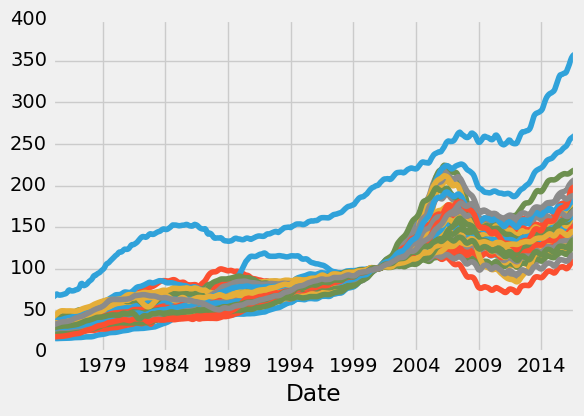

In [54]:
HPI_data.plot()
pyplot.legend().remove()
pyplot.show()

# All those prices seem to converge perfectly in 2000! Well, this is just when the 100.0% of the index starts.
# What about some sort of percent change?

In [55]:
# Pandas has you covered here with all sorts of "rolling" statistics.
HPI_pct_change_data=HPI_data.pct_change()

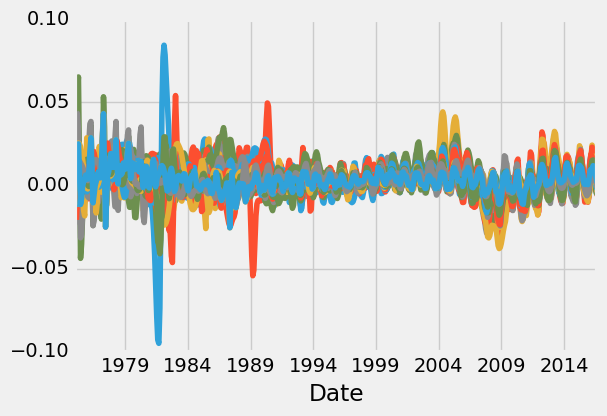

In [56]:
HPI_pct_change_data.plot()
pyplot.legend().remove()
pyplot.show()

# This is not a traditional % Change chart. 
# This is %change from the last reported value.

In [57]:
HPI_pct_change=HPI_data
for col in HPI_pct_change.columns:
    HPI_pct_change[col]=(HPI_pct_change[col]-HPI_pct_change[col][0])/HPI_pct_change[col][0]*100.0

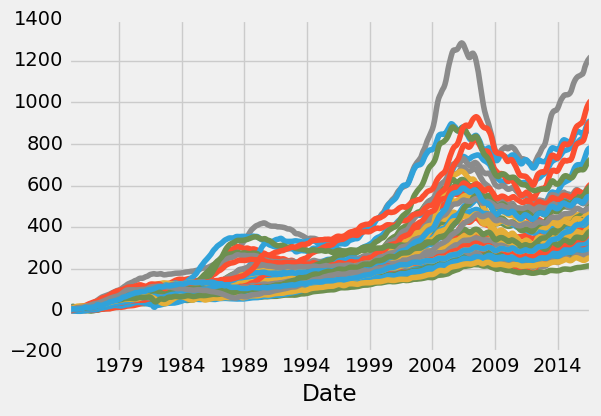

In [58]:
HPI_pct_change.plot()
pyplot.legend().remove()
pyplot.show()

# This is a % change for the HPI itself, by state. 
# The first % change is still useful too for various reasons. 
# We may wind up using that one in conjunction or instead, 
# but, for now, we'll stick with typical % change from a starting point.

In [59]:
# For this data, a benchmark would be the House Price Index for the United States.
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken="Ti87qx22utFydZWJHqyB")
    df.rename(columns={'Value':'United States'},inplace=True)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

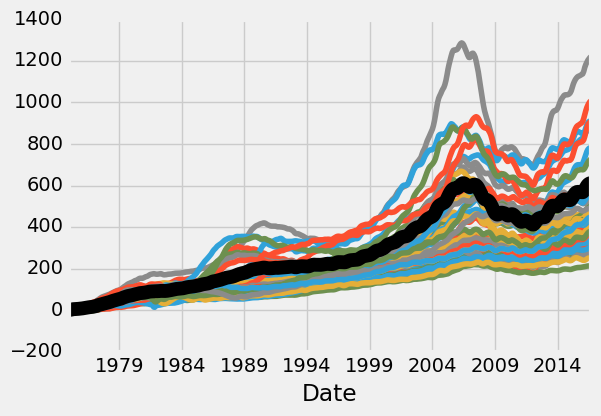

In [60]:
fig = pyplot.figure()
ax1 = pyplot.subplot2grid((1,1), (0,0))

benchmark = HPI_Benchmark()
HPI_pct_change.plot(ax=ax1)
benchmark.plot(color='k',ax=ax1, linewidth=10)

pyplot.legend().remove()
pyplot.show()

# Looking at this data, it appears to be that all markets are relatively closely obeying each other as well as 
# the overall house price index. There does exist some mean deviation here, but basically every market appears 
# to follow a very similar trend. There winds up being quite a major divergence in the end, from 200% increase 
# to over 800% increase, so obviously we have a major divergence there, but the mean is between 400 and 500% 
# growth in the last upper 30 years.

In [61]:
# Correlation is the measure of the degree by which two assets move in relation to eachother. 
# Covariance is the measure of how two assets tend to vary together. 
# Notice that correlation is a measure to the "degree" of. Covariance isn't. 

# Let's create a correlation table. What this will do for us, is look back historically, and measure 
# the correlation between every single state's movements to every other state. Then, when two states that 
# are normally very highly correlated start to diverge, we could consider selling property in the one that 
# is rising, and buying property in the one that is falling as a sort of market neutral strategy where we're 
# just profiting on the gap, rather than making some sort of attempt to predict the future. States that border 
# each other probably are more likely to have more similar correlations than those far away, but we'll see what 
# the numbers say.
hpi_state_corr=HPI_pct_change.corr()
hpi_state_corr

# Correlation is bounded from -1 to positive 1. 1 being a perfect correlation, and -1 being a perfect negative 
# correlation. Covariance has no bound.

AL        AK        AZ        AR        CA        CO        CT  \
AL   1.000000  0.946418  0.937592  0.995119  0.942310  0.965541  0.953146   
AK   0.946418  1.000000  0.910237  0.967983  0.921818  0.960382  0.884600   
AZ   0.937592  0.910237  1.000000  0.936454  0.976776  0.919486  0.917688   
AR   0.995119  0.967983  0.936454  1.000000  0.945774  0.976929  0.944746   
CA   0.942310  0.921818  0.976776  0.945774  1.000000  0.938870  0.942463   
CO   0.965541  0.960382  0.919486  0.976929  0.938870  1.000000  0.889392   
CT   0.953146  0.884600  0.917688  0.944746  0.942463  0.889392  1.000000   
DE   0.982824  0.938068  0.948801  0.977921  0.967911  0.936764  0.979810   
FL   0.929395  0.900713  0.994380  0.928081  0.985869  0.910895  0.926355   
GA   0.978346  0.899525  0.949167  0.968410  0.951573  0.956025  0.947469   
HI   0.944752  0.947413  0.916923  0.951617  0.951263  0.928241  0.915631   
ID   0.983136  0.953404  0.965198  0.980867  0.954768  0.962413  0.917955   
IL   0.983692  0.899603  0.947529  0.971113  0.953901  0.939419  0.958374   
IN   0.983855  0.903966  0.899364  0.977312  0.914634  0.961496  0.922407   
IA   0.985434  0.954436  0.912447  0.989720  0.930562  0.985693  0.910157   
KS   0.989496  0.964757  0.926154  0.995277  0.941173  0.989344  0.928693   
KY   0.994332  0.946701  0.917390  0.994178  0.936200  0.978925  0.937581   
LA   0.966664  0.992502  0.924051  0.982658  0.930218  0.975262  0.897732   
ME   0.976759  0.940709  0.936183  0.976928  0.968159  0.946687  0.983722   
MD   0.969675  0.944668  0.965352  0.969750  0.980935  0.933739  0.967394   
MA   0.970801  0.930523  0.934268  0.972517  0.966969  0.955733  0.978691   
MI   0.903473  0.771111  0.863715  0.886418  0.870084  0.888848  0.858025   
MN   0.976315  0.934883  0.959047  0.977211  0.972211  0.972480  0.944407   
MS   0.996520  0.963309  0.938513  0.997697  0.941894  0.973874  0.944285   
MO   0.993873  0.938797  0.947188  0.991297  0.958757  0.972391  0.959064   
MT   0.974121  0.982212  0.928209  0.983787  0.939705  0.975017  0.905319   
NE   0.986508  0.953399  0.914148  0.991408  0.930202  0.988325  0.913586   
NV   0.872598  0.801393  0.964619  0.861622  0.943090  0.838751  0.876240   
NH   0.959618  0.913121  0.940935  0.958676  0.967608  0.932572  0.987413   
NJ   0.971680  0.928850  0.948086  0.968597  0.968653  0.927007  0.989316   
NM   0.993101  0.962755  0.943021  0.992937  0.939615  0.953317  0.947403   
NY   0.977840  0.944144  0.932909  0.978121  0.962826  0.944382  0.983996   
NC   0.998317  0.941936  0.929046  0.993249  0.939050  0.968365  0.952985   
ND   0.902227  0.964140  0.846203  0.929000  0.883047  0.950659  0.823583   
OH   0.969046  0.862634  0.894522  0.956087  0.905167  0.936379  0.918310   
OK   0.947181  0.988448  0.901707  0.969293  0.908747  0.969076  0.871562   
OR   0.977741  0.959812  0.955111  0.979389  0.956000  0.975643  0.905014   
PA   0.987218  0.951013  0.928817  0.986576  0.956387  0.951410  0.969914   
RI   0.954402  0.895370  0.946265  0.948688  0.974351  0.910224  0.988253   
SC   0.998306  0.951217  0.941651  0.994964  0.951189  0.972161  0.955383   
SD   0.976382  0.974957  0.906742  0.986937  0.930504  0.986830  0.905662   
TN   0.994551  0.958200  0.932276  0.995595  0.945515  0.982027  0.940744   
TX   0.940841  0.980514  0.896961  0.962400  0.917953  0.977895  0.873570   
UT   0.979483  0.963944  0.936448  0.982990  0.928609  0.978576  0.890769   
VT   0.978591  0.956485  0.924615  0.981747  0.956815  0.948834  0.967854   
VA   0.975277  0.962226  0.958568  0.979944  0.979699  0.954017  0.962382   
WA   0.985060  0.958805  0.956881  0.984041  0.965064  0.972331  0.929065   
WV   0.982097  0.972376  0.919514  0.990395  0.936562  0.977987  0.914855   
WI   0.991161  0.930831  0.935717  0.986244  0.945139  0.967228  0.939192   
WY   0.946695  0.987373  0.909381  0.964090  0.919537  0.959549  0.871945   
TX2  0.940841  0.980514  0.896961  0.962400  0.917953  0.977895  0.873570   

      

In [62]:
hpi_state_corr.describe()

# This tells us, per state, what the lowest correlation was, what the average correlation was, what the standard 
# deviation is, the 25% lowest, the middle (median / 50%)... and so on. Obviously they all have a max 1.0, 
# because they are perfectly correlated with themselves. Most importantly, however, all of these states that we're 
# seeing here (some of the 50 columns are skipped, we go from GA to SD) have above a 90% correlation with everyone 
# else on average. Wyoming gets as low as 74% correlation with a state, which, after looking at our table, is Michigan. Because of this, we would probably not want to Invest in Wyoming, if Michigan is leading the pack up, or sell our house in Michigan just because Wyoming is falling hard.

# Not only could we look for any deviations from the overall index, we could also look for deviations from the 
# individual markets as well. As you can see, we have the standard deviation numbers for every state. We could make 
# attempts to invest in real estate when the market falls below the standard deviations, or sell when markets get 
# above standard deviation.

AL         AK         AZ         AR         CA         CO  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean    0.968830   0.940063   0.932024   0.971082   0.945374   0.954810   
std     0.026802   0.042969   0.028171   0.026698   0.025049   0.030022   
min     0.872598   0.771111   0.846203   0.861622   0.870084   0.838751   
25%     0.953774   0.929686   0.917156   0.963245   0.930533   0.939144   
50%     0.976759   0.951013   0.934268   0.977921   0.945139   0.961496   
75%     0.985971   0.963626   0.947808   0.988329   0.963945   0.975452   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              CT         DE         FL         GA    ...             TN  \
count  51.000000  51.000000  51.000000  51.000000    ...      51.000000   
mean    0.930739   0.962567   0.928444   0.952118    ...       0.970078   
std     0.039620   0.029091   0.032279   0.028088    ...       0.026881   
min     0.823583   0.864550   0.832715   0.849939    ...       0.856773   
25%     0.905490   0.949841   0.910747   0.943511    ...       0.959813   
50%     0.937581   0.970738   0.928466   0.956171    ...       0.975749   
75%     0.958719   0.980436   0.949894   0.970658    ...       0.987562   
max     1.000000   1.000000   1.000000   1.000000    ...       1.000000   

              TX         UT         VT         VA         WA         WV  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean    0.935890   0.957091   0.962075   0.965776   0.967788   0.963209   
std     0.041857   0.032067   0.031122   0.026689   0.024367   0.033053   
min     0.790516   0.848739   0.838633   0.846263   0.871264   0.829693   
25%     0.918106   0.942990   0.955404   0.960981   0.958861   0.954742   
50%     0.942039   0.961318   0.969925   0.974144   0.974422   0.974391   
75%     0.963004   0.980979   0.979097   0.979068   0.982886   0.985139   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              WI         WY        TX2  
count  51.000000  51.000000  51.000000  
mean    0.963797   0.939243   0.935890  
std     0.026795   0.044753   0.041857  
min     0.882989   0.767608   0.790516  
25%     0.950053   0.922342   0.918106  
50%     0.969068   0.950632   0.942039  
75%     0.984573   0.964744   0.963004  
max     1.000000   1.000000   1.000000  

[8 rows x 51 columns]

# Resampling #

In [63]:
TX1yr = HPI_pct_change['TX'].resample('A')
print(TX1yr.head())

Date
1975-12-31     4.001836
1976-12-31    11.464859
1977-12-31    22.668530
1978-12-31    40.861312
1979-12-31    63.444913
Freq: A-DEC, Name: TX, dtype: float64


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


In [64]:
TX1yr = HPI_pct_change['TX'].resample('A').mean()
print(TX1yr.head())

# To learn more about the offset strings, please see this link
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases


Date
1975-12-31     4.001836
1976-12-31    11.464859
1977-12-31    22.668530
1978-12-31    40.861312
1979-12-31    63.444913
Freq: A-DEC, Name: TX, dtype: float64


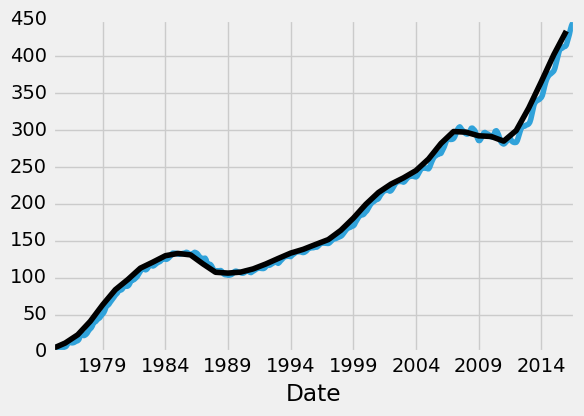

In [65]:
HPI_pct_change['TX'].plot()
TX1yr.plot(color='k')

pyplot.legend().remove()
pyplot.show()

# As you can see, moving from monthly to annual data has not really hidden anything from us regarding the trend 
# line itself

# Handling Missing Data #
+ Ignore it - Just leave it there
+ Delete it - Remove all cases. Remove from data entirely. This means forfeiting the entire row of data.
+ Fill forward or backwards - This means taking the prior or following value and just filling it in.
+ Replace it with something static - For example, replacing all NaN data with -9999.

In [66]:
# Notice the resampling is being done now by adding a new column to the HPI_data dataframe.
# This produces NaNs
HPI_pct_change['TX1yr'] = HPI_pct_change['TX'].resample('A').mean()
HPI_pct_change[['TX','TX1yr']]

TX       TX1yr
Date                              
1975-01-31    0.000000         NaN
1975-02-28    0.951488         NaN
1975-03-31    2.701039         NaN
1975-04-30    5.276570         NaN
1975-05-31    6.099286         NaN
1975-06-30    4.882747         NaN
1975-07-31    4.067261         NaN
1975-08-31    4.011509         NaN
1975-09-30    4.272719         NaN
1975-10-31    4.606024         NaN
1975-11-30    5.261535         NaN
1975-12-31    5.891854    4.001836
1976-01-31    6.301948         NaN
1976-02-29    7.219763         NaN
1976-03-31    9.422551         NaN
1976-04-30   12.572041         NaN
1976-05-31   13.553547         NaN
1976-06-30   12.362672         NaN
1976-07-31   11.779576         NaN
1976-08-31   11.780492         NaN
1976-09-30   12.048459         NaN
1976-10-31   12.698906         NaN
1976-11-30   13.620130         NaN
1976-12-31   14.218217   11.464859
1977-01-31   14.742006         NaN
1977-02-28   16.188283         NaN
1977-03-31   19.550528         NaN
1977-04-30   24.724240         NaN
1977-05-31   25.583865         NaN
1977-06-30   22.434240         NaN
...                ...         ...
2014-04-30  358.514195         NaN
2014-05-31  363.844133         NaN
2014-06-30  368.312081         NaN
2014-07-31  371.399166         NaN
2014-08-31  373.668731         NaN
2014-09-30  375.378778         NaN
2014-10-31  376.310155         NaN
2014-11-30  377.452510         NaN
2014-12-31  378.784349  365.626445
2015-01-31  380.324786         NaN
2015-02-28  383.847295         NaN
2015-03-31  389.570965         NaN
2015-04-30  395.528010         NaN
2015-05-31  401.108652         NaN
2015-06-30  406.310999         NaN
2015-07-31  409.911550         NaN
2015-08-31  410.795401         NaN
2015-09-30  411.107680         NaN
2015-10-31  412.400021         NaN
2015-11-30  413.319099         NaN
2015-12-31  413.591667  402.318010
2016-01-31  415.471255         NaN
2016-02-29  420.221176         NaN
2016-03-31  425.242406         NaN
2016-04-30  430.403954         NaN
2016-05-31  436.738910         NaN
2016-06-30  441.620726         NaN
2016-07-31  444.858668         NaN
2016-08-31  447.098030         NaN
2016-09-30  447.869345         NaN

[501 rows x 2 columns]

In [67]:
# dropping NaNs
HPI_NaNs=HPI_pct_change.copy()
HPI_NaNs.dropna(inplace=True)
print(HPI_pct_change[['TX','TX1yr']].head(12))
print(HPI_NaNs[['TX','TX1yr']].head(12))

# to drop row if all columns are NaN
# df.dropna(how='all',inplace=True)
# to drop row if any column has NaN, use 'any' with a threshold
# for details: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

                  TX     TX1yr
Date                          
1975-01-31  0.000000       NaN
1975-02-28  0.951488       NaN
1975-03-31  2.701039       NaN
1975-04-30  5.276570       NaN
1975-05-31  6.099286       NaN
1975-06-30  4.882747       NaN
1975-07-31  4.067261       NaN
1975-08-31  4.011509       NaN
1975-09-30  4.272719       NaN
1975-10-31  4.606024       NaN
1975-11-30  5.261535       NaN
1975-12-31  5.891854  4.001836
                    TX       TX1yr
Date                              
1975-12-31    5.891854    4.001836
1976-12-31   14.218217   11.464859
1977-12-31   29.395393   22.668530
1978-12-31   49.589010   40.861312
1979-12-31   74.325257   63.444913
1980-12-31   88.337712   83.742599
1981-12-31  106.500868   97.551822
1982-12-31  116.357036  112.956569
1983-12-31  125.891951  121.168797
1984-12-31  132.721428  129.847160
1985-12-31  131.928909  132.896144
1986-12-31  126.201357  130.979202


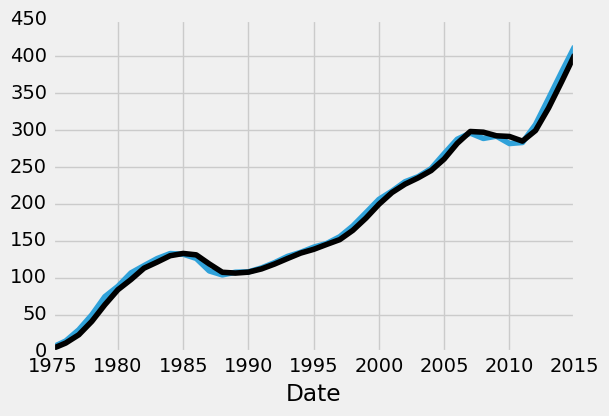

In [68]:
HPI_NaNs['TX'].plot()
HPI_NaNs['TX1yr'].plot(color='k')

pyplot.legend().remove()
pyplot.show()

In [69]:
# filling NaNs - forward
HPI_NaNs=HPI_pct_change.copy()
HPI_NaNs.fillna(method='ffill',inplace=True)
print(HPI_pct_change[['TX','TX1yr']].head(24))
print(HPI_NaNs[['TX','TX1yr']].head(24))

                   TX      TX1yr
Date                            
1975-01-31   0.000000        NaN
1975-02-28   0.951488        NaN
1975-03-31   2.701039        NaN
1975-04-30   5.276570        NaN
1975-05-31   6.099286        NaN
1975-06-30   4.882747        NaN
1975-07-31   4.067261        NaN
1975-08-31   4.011509        NaN
1975-09-30   4.272719        NaN
1975-10-31   4.606024        NaN
1975-11-30   5.261535        NaN
1975-12-31   5.891854   4.001836
1976-01-31   6.301948        NaN
1976-02-29   7.219763        NaN
1976-03-31   9.422551        NaN
1976-04-30  12.572041        NaN
1976-05-31  13.553547        NaN
1976-06-30  12.362672        NaN
1976-07-31  11.779576        NaN
1976-08-31  11.780492        NaN
1976-09-30  12.048459        NaN
1976-10-31  12.698906        NaN
1976-11-30  13.620130        NaN
1976-12-31  14.218217  11.464859
                   TX      TX1yr
Date                            
1975-01-31   0.000000        NaN
1975-02-28   0.951488        NaN
1975-03-31

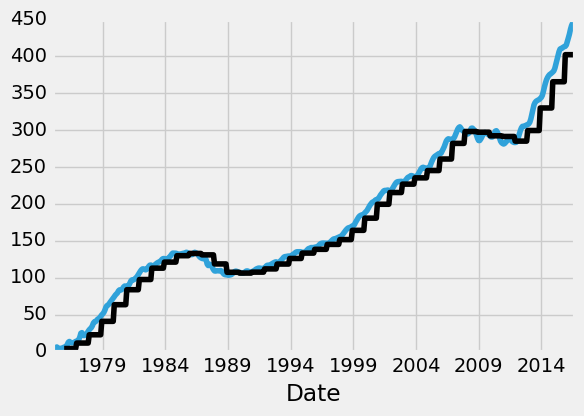

In [70]:
HPI_NaNs['TX'].plot()
HPI_NaNs['TX1yr'].plot(color='k')

pyplot.legend().remove()
pyplot.show()

In [71]:
# filling NaNs - backwards
HPI_NaNs=HPI_pct_change.copy()
HPI_NaNs.fillna(method='bfill',inplace=True)
print(HPI_pct_change[['TX','TX1yr']].head(24))
print(HPI_NaNs[['TX','TX1yr']].head(24))

                   TX      TX1yr
Date                            
1975-01-31   0.000000        NaN
1975-02-28   0.951488        NaN
1975-03-31   2.701039        NaN
1975-04-30   5.276570        NaN
1975-05-31   6.099286        NaN
1975-06-30   4.882747        NaN
1975-07-31   4.067261        NaN
1975-08-31   4.011509        NaN
1975-09-30   4.272719        NaN
1975-10-31   4.606024        NaN
1975-11-30   5.261535        NaN
1975-12-31   5.891854   4.001836
1976-01-31   6.301948        NaN
1976-02-29   7.219763        NaN
1976-03-31   9.422551        NaN
1976-04-30  12.572041        NaN
1976-05-31  13.553547        NaN
1976-06-30  12.362672        NaN
1976-07-31  11.779576        NaN
1976-08-31  11.780492        NaN
1976-09-30  12.048459        NaN
1976-10-31  12.698906        NaN
1976-11-30  13.620130        NaN
1976-12-31  14.218217  11.464859
                   TX      TX1yr
Date                            
1975-01-31   0.000000   4.001836
1975-02-28   0.951488   4.001836
1975-03-31

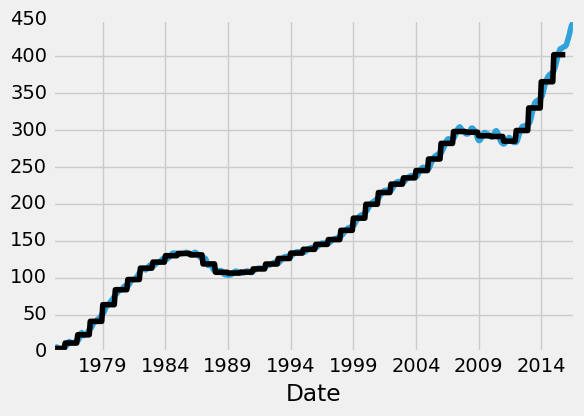

In [72]:
HPI_NaNs['TX'].plot()
HPI_NaNs['TX1yr'].plot(color='k')

pyplot.legend().remove()
pyplot.show()

In [73]:
# Replacing data
# NaN data is relatively worthless data, but it can taint the rest of our data. Take, for example, machine learning, 
# where each row is a feature set and each column is a feature. Data has a very high value to us, and if we have a 
# large amount of NaN data, forfeiting all of the data is a huge bummer. For this reason, you may actually use a 
# replace instead. With most machine learning classifiers, extreme outliers are often ignored in the end as their 
# own data point. Because of this, what many people will do is take any NaN data, and replace it with a value of, 
# say, -99999. This is because, after pre-processing the data, you generally want to convert all features to a range 
# of -1 to positive 1. A data point that is -99999 is a clear and obvious outlier to almost any classifier. NaN data, 
# however, simply cannot be handled at all!
HPI_NaNs=HPI_pct_change.copy()
HPI_NaNs.fillna(value=-99999,inplace=True)
print(HPI_pct_change[['TX','TX1yr']].head(24))
print(HPI_NaNs[['TX','TX1yr']].head(24))

                   TX      TX1yr
Date                            
1975-01-31   0.000000        NaN
1975-02-28   0.951488        NaN
1975-03-31   2.701039        NaN
1975-04-30   5.276570        NaN
1975-05-31   6.099286        NaN
1975-06-30   4.882747        NaN
1975-07-31   4.067261        NaN
1975-08-31   4.011509        NaN
1975-09-30   4.272719        NaN
1975-10-31   4.606024        NaN
1975-11-30   5.261535        NaN
1975-12-31   5.891854   4.001836
1976-01-31   6.301948        NaN
1976-02-29   7.219763        NaN
1976-03-31   9.422551        NaN
1976-04-30  12.572041        NaN
1976-05-31  13.553547        NaN
1976-06-30  12.362672        NaN
1976-07-31  11.779576        NaN
1976-08-31  11.780492        NaN
1976-09-30  12.048459        NaN
1976-10-31  12.698906        NaN
1976-11-30  13.620130        NaN
1976-12-31  14.218217  11.464859
                   TX         TX1yr
Date                               
1975-01-31   0.000000 -99999.000000
1975-02-28   0.951488 -99999.00000

# Rolling Statistics #

In [74]:
# One rolling statistics is the moving average. This takes a moving window of time, and calculates the average or 
# the mean of that time period as the current value. In our case, we have monthly data. So a 10 month moving average 
# would be the current value, plus the previous 9 months of data, averaged, and there we would have a 10 month moving 
# average of our monthly data. 
# Pandas comes with a few pre-made rolling statistical functions
# Also, rolling_apply() can be used for custom logic
# for details:
# http://pandas.pydata.org/pandas-docs/version/0.15.2/computation.html#moving-rolling-statistics-moments

# 6MMA - NaN for the first 6 months, mean values follow on
HPI_6MMA=pd.rolling_mean(HPI_pct_change,6)
HPI_6MMA.head(10)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()


AL         AK        AZ        AR        CA        CO  \
Date                                                                      
1975-01-31       NaN        NaN       NaN       NaN       NaN       NaN   
1975-02-28       NaN        NaN       NaN       NaN       NaN       NaN   
1975-03-31       NaN        NaN       NaN       NaN       NaN       NaN   
1975-04-30       NaN        NaN       NaN       NaN       NaN       NaN   
1975-05-31       NaN        NaN       NaN       NaN       NaN       NaN   
1975-06-30  1.822144   3.932989  3.266744  1.807033  2.788970  2.665294   
1975-07-31  2.405825   5.606603  3.943781  2.477769  3.917885  3.572201   
1975-08-31  2.794169   7.314570  4.077358  3.067549  5.221228  4.283019   
1975-09-30  2.948915   9.014726  3.672178  3.543318  6.579314  4.741827   
1975-10-31  2.896036  10.673790  2.909238  3.904578  7.841270  4.999147   

                  CT        DE         FL        GA  ...          TX  \
Date                                                 ...               
1975-01-31       NaN       NaN        NaN       NaN  ...         NaN   
1975-02-28       NaN       NaN        NaN       NaN  ...         NaN   
1975-03-31       NaN       NaN        NaN       NaN  ...         NaN   
1975-04-30       NaN       NaN        NaN       NaN  ...         NaN   
1975-05-31       NaN       NaN        NaN       NaN  ...         NaN   
1975-06-30  3.357846  0.991542  10.220317 -0.748427  ...    3.318522   
1975-07-31  4.126060  1.604548  11.675567 -0.902687  ...    3.996398   
1975-08-31  4.534407  2.319718  12.155119 -1.047477  ...    4.506402   
1975-09-30  4.707178  3.097611  11.585346 -1.324008  ...    4.768349   
1975-10-31  4.804574  3.858200   9.898978 -1.794595  ...    4.656591   

                  UT        VT        VA        WA         WV        WI  \
Date                                                                      
1975-01-31       NaN       NaN       NaN       NaN        NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN        NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN        NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN        NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN        NaN       NaN   
1975-06-30  2.760680  2.162156  1.789058  1.451925   6.479529  3.182398   
1975-07-31  3.466775  2.934137  2.415807  2.102493   9.031602  4.249997   
1975-08-31  3.866007  3.613977  2.993811  2.776992  11.470452  5.167887   
1975-09-30  4.021924  4.183465  3.494342  3.366721  13.680930  5.966632   
1975-10-31  4.100388  4.643253  3.881292  3.855443  15.538132  6.694337   

                  WY       TX2  TX1yr  
Date                                   
1975-01-31       NaN       NaN    NaN  
1975-02-28       NaN       NaN    NaN  
1975-03-31       NaN       NaN    NaN  
1975-04-30       NaN       NaN    NaN  
1975-05-31       NaN       NaN    NaN  
1975-06-30  3.757594  3.318522    NaN  
1975-07-31  5.233709  3.996398    NaN  
1975-08-31  6.670520  4.506402    NaN  
1975-09-30  8.025583  4.768349    NaN  
1975-10-31  9.248462  4.656591    NaN  

[10 rows x 52 columns]

In [75]:
HPI_6MMA=HPI_pct_change.rolling(window=6,center=False).mean()
HPI_6MMA.head(10)

AL         AK        AZ        AR        CA        CO  \
Date                                                                      
1975-01-31       NaN        NaN       NaN       NaN       NaN       NaN   
1975-02-28       NaN        NaN       NaN       NaN       NaN       NaN   
1975-03-31       NaN        NaN       NaN       NaN       NaN       NaN   
1975-04-30       NaN        NaN       NaN       NaN       NaN       NaN   
1975-05-31       NaN        NaN       NaN       NaN       NaN       NaN   
1975-06-30  1.822144   3.932989  3.266744  1.807033  2.788970  2.665294   
1975-07-31  2.405825   5.606603  3.943781  2.477769  3.917885  3.572201   
1975-08-31  2.794169   7.314570  4.077358  3.067549  5.221228  4.283019   
1975-09-30  2.948915   9.014726  3.672178  3.543318  6.579314  4.741827   
1975-10-31  2.896036  10.673790  2.909238  3.904578  7.841270  4.999147   

                  CT        DE         FL        GA  ...          TX  \
Date                                                 ...               
1975-01-31       NaN       NaN        NaN       NaN  ...         NaN   
1975-02-28       NaN       NaN        NaN       NaN  ...         NaN   
1975-03-31       NaN       NaN        NaN       NaN  ...         NaN   
1975-04-30       NaN       NaN        NaN       NaN  ...         NaN   
1975-05-31       NaN       NaN        NaN       NaN  ...         NaN   
1975-06-30  3.357846  0.991542  10.220317 -0.748427  ...    3.318522   
1975-07-31  4.126060  1.604548  11.675567 -0.902687  ...    3.996398   
1975-08-31  4.534407  2.319718  12.155119 -1.047477  ...    4.506402   
1975-09-30  4.707178  3.097611  11.585346 -1.324008  ...    4.768349   
1975-10-31  4.804574  3.858200   9.898978 -1.794595  ...    4.656591   

                  UT        VT        VA        WA         WV        WI  \
Date                                                                      
1975-01-31       NaN       NaN       NaN       NaN        NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN        NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN        NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN        NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN        NaN       NaN   
1975-06-30  2.760680  2.162156  1.789058  1.451925   6.479529  3.182398   
1975-07-31  3.466775  2.934137  2.415807  2.102493   9.031602  4.249997   
1975-08-31  3.866007  3.613977  2.993811  2.776992  11.470452  5.167887   
1975-09-30  4.021924  4.183465  3.494342  3.366721  13.680930  5.966632   
1975-10-31  4.100388  4.643253  3.881292  3.855443  15.538132  6.694337   

                  WY       TX2  TX1yr  
Date                                   
1975-01-31       NaN       NaN    NaN  
1975-02-28       NaN       NaN    NaN  
1975-03-31       NaN       NaN    NaN  
1975-04-30       NaN       NaN    NaN  
1975-05-31       NaN       NaN    NaN  
1975-06-30  3.757594  3.318522    NaN  
1975-07-31  5.233709  3.996398    NaN  
1975-08-31  6.670520  4.506402    NaN  
1975-09-30  8.025583  4.768349    NaN  
1975-10-31  9.248462  4.656591    NaN  

[10 rows x 52 columns]

In [76]:
# rolling standard deviation
HPI_6MSTD=pd.rolling_std(HPI_pct_change,6)
HPI_6MSTD.head(8)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).std()
  from ipykernel import kernelapp as app


AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-06-30  1.408067  3.051622  2.062008  1.266496  2.530928  1.877741   
1975-07-31  1.214180  3.212595  1.301558  1.180861  2.548700  1.630821   
1975-08-31  0.848954  3.306343  1.038317  1.082600  2.355204  1.255152   

                  CT        DE        FL        GA  ...          TX        UT  \
Date                                                ...                         
1975-01-31       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-06-30  1.945935  1.080577  7.138711  0.450018  ...    2.490386  1.779894   
1975-07-31  1.066148  1.401263  5.288879  0.261165  ...    1.886852  1.217012   
1975-08-31  0.418328  1.588330  4.521903  0.440505  ...    1.180608  0.674908   

                  VT        VA        WA        WV        WI        WY  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-06-30  1.531928  1.150388  1.201302  4.909103  2.217298  2.838771   
1975-07-31  1.384409  0.994575  1.309799  4.846729  1.897618  2.796456   
1975-08-31  1.201906  1.006010  1.298201  4.573711  1.545497  2.668247   

                 TX2  TX1yr  
Date                         
1975-01-31       NaN    NaN  
1975-02-28       NaN    NaN  
1975-03-31       NaN    NaN  
1975-04-30       NaN    NaN  
1975-05-31       NaN    NaN  
1975-06-30  2.490386    NaN  
1975-07-31  1.886852    NaN  
1975-08-31  1.180608    NaN  

[8 rows x 52 columns]

In [77]:
HPI_6MSTD=HPI_pct_change.rolling(window=6,center=False).std()
HPI_6MSTD.head(8)

AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-06-30  1.408067  3.051622  2.062008  1.266496  2.530928  1.877741   
1975-07-31  1.214180  3.212595  1.301558  1.180861  2.548700  1.630821   
1975-08-31  0.848954  3.306343  1.038317  1.082600  2.355204  1.255152   

                  CT        DE        FL        GA  ...          TX        UT  \
Date                                                ...                         
1975-01-31       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN  ...         NaN       NaN   
1975-06-30  1.945935  1.080577  7.138711  0.450018  ...    2.490386  1.779894   
1975-07-31  1.066148  1.401263  5.288879  0.261165  ...    1.886852  1.217012   
1975-08-31  0.418328  1.588330  4.521903  0.440505  ...    1.180608  0.674908   

                  VT        VA        WA        WV        WI        WY  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1975-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
1975-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-06-30  1.531928  1.150388  1.201302  4.909103  2.217298  2.838771   
1975-07-31  1.384409  0.994575  1.309799  4.846729  1.897618  2.796456   
1975-08-31  1.201906  1.006010  1.298201  4.573711  1.545497  2.668247   

                 TX2  TX1yr  
Date                         
1975-01-31       NaN    NaN  
1975-02-28       NaN    NaN  
1975-03-31       NaN    NaN  
1975-04-30       NaN    NaN  
1975-05-31       NaN    NaN  
1975-06-30  2.490386    NaN  
1975-07-31  1.886852    NaN  
1975-08-31  1.180608    NaN  

[8 rows x 52 columns]

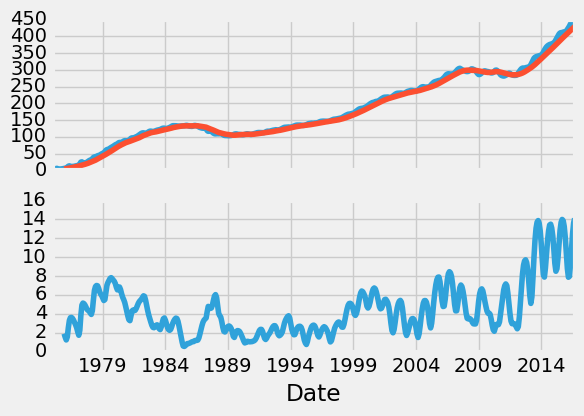

In [78]:
fig = pyplot.figure()
ax1 = pyplot.subplot2grid((2,1), (0,0))
ax2 = pyplot.subplot2grid((2,1), (1,0), sharex=ax1)
HPI_12MMA=HPI_pct_change.rolling(window=12,center=False).mean()
HPI_12MSTD=HPI_pct_change.rolling(window=12,center=False).std()
HPI_pct_change['TX'].plot(ax=ax1)
HPI_12MMA['TX'].plot(ax=ax1)
HPI_12MSTD['TX'].plot(ax=ax2)
pyplot.show()

In [79]:
# rolling correlation
TX_AK_12corr=pd.rolling_corr(HPI_pct_change['TX'],HPI_pct_change['AK'],12)
TX_AK_12corr.tail()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12).corr(other=<Series>)
  from ipykernel import kernelapp as app


Date
2016-05-31    0.595306
2016-06-30    0.724785
2016-07-31    0.820322
2016-08-31    0.895592
2016-09-30    0.938878
dtype: float64

In [80]:
TX_AK_12corr=HPI_pct_change['TX'].rolling(window=12).corr(other=HPI_pct_change['AK'])
TX_AK_12corr.tail()

Date
2016-05-31    0.595306
2016-06-30    0.724785
2016-07-31    0.820322
2016-08-31    0.895592
2016-09-30    0.938878
dtype: float64

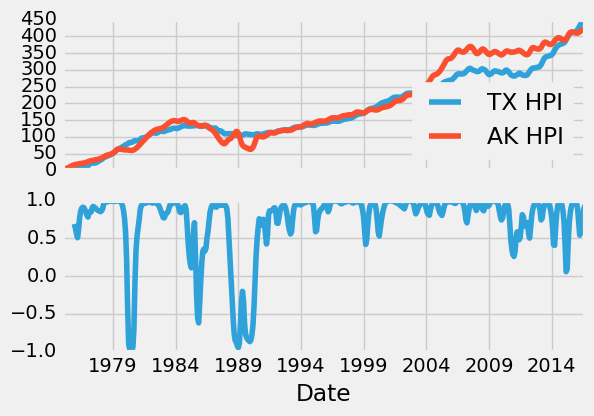

In [81]:
fig = pyplot.figure()
ax1 = pyplot.subplot2grid((2,1), (0,0))
ax2 = pyplot.subplot2grid((2,1), (1,0), sharex=ax1)

HPI_pct_change['TX'].plot(ax=ax1, label="TX HPI")
HPI_pct_change['AK'].plot(ax=ax1, label="AK HPI")
ax1.legend(loc=4)

TX_AK_12corr.plot(ax=ax2)

pyplot.show()

# Every time correlation drops, you should in theory sell property in the are that is rising, and then you should 
# buy property in the area that is falling. The idea is that, these two areas are so highly correlated that we can 
# be very confident that the correlation will eventually return back to about 0.98. As such, when correlation is 
# -0.5, we can be very confident in our decision to make this move, as the outcome can be one of the following: HPI 
# forever diverges like this and never returns (unlikely), the falling area rises up to meet the rising one, in which 
# case we win, the rising area falls to meet the other falling one, in which case we made a great sale, or both move 
# to re-converge, in which case we definitely won out. It's unlikely with HPI that these markets will fully diverge 
# permanantly. We can see clearly that this just simply doesnt happen, and we've got 40 years of data to back that up.

# Applying Comparison Operators to DataFrame #

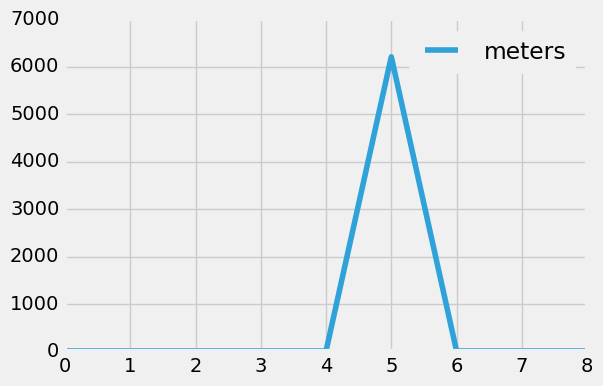

In [82]:
# Handling erroneous/outlier data
bridge_height = {'meters':[10.26, 10.31, 10.27, 10.22, 10.23, 6212.42, 10.28, 10.25, 10.31]}
df_bridge = pd.DataFrame(bridge_height)

df_bridge.plot()
pyplot.show()

In [83]:
df_bridge['std']=df_bridge.rolling(window=2,center=False).std()
df_bridge

meters          std
0    10.26          NaN
1    10.31     0.035355
2    10.27     0.028284
3    10.22     0.035355
4    10.23     0.007071
5  6212.42  4385.610607
6    10.28  4385.575252
7    10.25     0.021213
8    10.31     0.042426

In [84]:
df_bridge_std=df_bridge.describe()
df_bridge_std

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


meters          std
count     9.000000     8.000000
mean    699.394444  1096.419446
std    2067.384584  2030.121949
min      10.220000     0.007071
25%      10.250000          NaN
50%      10.270000          NaN
75%      10.310000          NaN
max    6212.420000  4385.610607

In [85]:
df_bridge=df_bridge[(df_bridge['std']<df_bridge_std['meters']['std'])]
df_bridge

meters       std
1   10.31  0.035355
2   10.27  0.028284
3   10.22  0.035355
4   10.23  0.007071
7   10.25  0.021213
8   10.31  0.042426

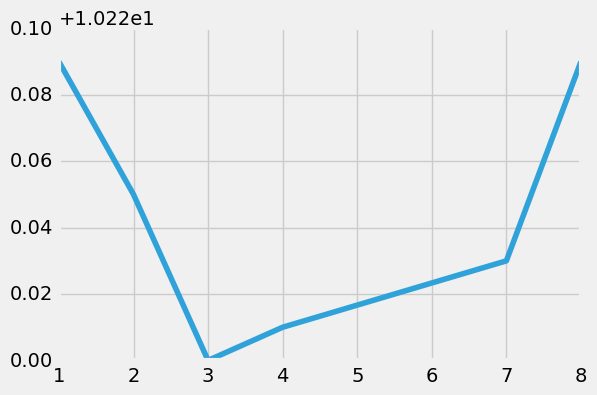

In [86]:
df_bridge['meters'].plot()
pyplot.show()

# Joining 30 year mortgage rate #